<div align=center><font size = 5>Toronto Neighborhood Clustering and Segmenting</font></div>

## Improting required libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from urllib.request import urlopen
from bs4 import BeautifulSoup

print('Libraries imported.')

Libraries imported.


## Improting data from wiki website

In this section I used pandas read_html function to read and store the table form the wiki web page into my pandas data frame called df.


In [2]:
df = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T")[1]
df.head()

Postal Code       Borough                                  Neighborhood  \
0         T1A  Medicine Hat                          Central Medicine Hat   
1         T2A       Calgary                Penbrooke Meadows, Marlborough   
2         T3A       Calgary  Dalhousie, Edgemont, Hamptons, Hidden Valley   
3         T4A       Airdrie                                  East Airdrie   
4         T5A      Edmonton              West Clareview, East Londonderry   

    Latitude    Longitude  
0  50.036460  -110.679250  
1  51.049680  -113.964320  
2  51.126060  -114.143158  
3  51.272450  -113.986980  
4    53.5899    -113.4413

**Then usning conditional method I dropped the rows where we had No Assigned listed.**

In [3]:
df1 = df[df.Borough != 'Not assigned']
df1 = df1[df1.Neighborhood != 'Not assigned']
df1 = df1[(df1['Latitude'] != 'Not assigned') & (df1['Longitude'] != 'Not assigned')]
df1.head()

Postal Code       Borough                                  Neighborhood  \
0         T1A  Medicine Hat                          Central Medicine Hat   
1         T2A       Calgary                Penbrooke Meadows, Marlborough   
2         T3A       Calgary  Dalhousie, Edgemont, Hamptons, Hidden Valley   
3         T4A       Airdrie                                  East Airdrie   
4         T5A      Edmonton              West Clareview, East Londonderry   

    Latitude    Longitude  
0  50.036460  -110.679250  
1  51.049680  -113.964320  
2  51.126060  -114.143158  
3  51.272450  -113.986980  
4    53.5899    -113.4413

In [4]:
df_Edmonton = df1[df1.Borough == 'Edmonton'].reset_index(drop=True)
df_Edmonton.head()

Postal Code   Borough                                       Neighborhood  \
0         T5A  Edmonton                   West Clareview, East Londonderry   
1         T6A  Edmonton                                     North Capilano   
2         T5B  Edmonton                   East North Central, West Beverly   
3         T6B  Edmonton  SE Capilano, West Southeast Industrial, East B...   
4         T5C  Edmonton                                Central Londonderry   

  Latitude  Longitude  
0  53.5899  -113.4413  
1  53.5483   -113.408  
2  53.5766  -113.4608  
3  53.5322  -113.4404  
4  53.6129  -113.4572

In [5]:
df_Calgary = df1[df1.Borough == 'Calgary'].reset_index(drop=True)
df_Calgary.head()

Postal Code  Borough                                       Neighborhood  \
0         T2A  Calgary                     Penbrooke Meadows, Marlborough   
1         T3A  Calgary       Dalhousie, Edgemont, Hamptons, Hidden Valley   
2         T2B  Calgary                     Forest Lawn, Dover, Erin Woods   
3         T3B  Calgary     Montgomery, Bowness, Silver Springs, Greenwood   
4         T2C  Calgary  Lynnwood Ridge, Ogden, Foothills Industrial, G...   

    Latitude    Longitude  
0  51.049680  -113.964320  
1  51.126060  -114.143158  
2    51.0318    -113.9786  
3    51.0809    -114.1616  
4    50.9878    -114.0001

## Explore and cluster the neighborhoods in Edmonton and Calgary

In this section I will focus on working to cluster neighborhoods of Edmonton and Calgary based on their features.

### Number of boroughs and neighborhoods in Edmonton

In this sub section I want to see how many boroughs and neiborhoods can I find in Edmonton

In [6]:
Edmonton_neighborhoods = df_Edmonton

In [7]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(Edmonton_neighborhoods['Borough'].unique()),
        Edmonton_neighborhoods.shape[0]
    )
)

The dataframe has 1 boroughs and 38 neighborhoods.


### Use geopy library to get the latitude and longitude values of Edmonton.

In [8]:
address = 'Edmonton, AB'

geolocator = Nominatim(user_agent="ed_explorer")
location = geolocator.geocode(address)
latitude_Ed = location.latitude
longitude_Ed = location.longitude
print('The geograpical coordinate of Edmonton are {}, {}.'.format(latitude_Ed, longitude_Ed))

The geograpical coordinate of Edmonton are 53.535411, -113.507996.


### Create a map of Edmonton with neighborhoods superimposed on top.

In [9]:
# create map of Edmonton using latitude and longitude values
map_Edmonton = folium.Map(location=[latitude_Ed, longitude_Ed], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhoods in zip(Edmonton_neighborhoods['Latitude'], Edmonton_neighborhoods['Longitude'], Edmonton_neighborhoods['Borough'], Edmonton_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhoods, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Edmonton)  
    
map_Edmonton.save("map_Edmonton.html")
map_Edmonton

### Number of boroughs and neighborhoods in Calgary

In this sub section I want to see how many boroughs and neiborhoods can I find in Calgary

In [10]:
Calgary_neighborhoods = df_Calgary

In [11]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(Calgary_neighborhoods['Borough'].unique()),
        Calgary_neighborhoods.shape[0]
    )
)

The dataframe has 1 boroughs and 34 neighborhoods.


### Use geopy library to get the latitude and longitude values of Calgary.

In [12]:
address = 'Calgary, AB'

geolocator = Nominatim(user_agent="ed_explorer")
location = geolocator.geocode(address)
latitude_Ca = location.latitude
longitude_Ca = location.longitude
print('The geograpical coordinate of Calgary are {}, {}.'.format(latitude_Ca, longitude_Ca))

The geograpical coordinate of Calgary are 51.0534234, -114.0625892.


### Create a map of Calgary with neighborhoods superimposed on top.

In [13]:
# create map of Calgary using latitude and longitude values
map_Calgary = folium.Map(location=[latitude_Ca, longitude_Ca], zoom_start=9.75)

# add markers to map
for lat, lng, borough, neighborhoods in zip(Calgary_neighborhoods['Latitude'], Calgary_neighborhoods['Longitude'], Calgary_neighborhoods['Borough'], Calgary_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhoods, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Calgary)  
    
map_Calgary.save("map_Calgary.html")
map_Calgary

### Define Foursquare Credentials and Version

In [14]:
CLIENT_ID = 'MEHCQZREABZ5UZDSC0DLNTS2O4QX4ZHHGV3WWEBSE3GGQVIV' # your Foursquare ID
CLIENT_SECRET = 'GPXYYZWQYZPDDC1S04H2WFIF3FTLBZOMCXUAXG51R2TJW0CM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MEHCQZREABZ5UZDSC0DLNTS2O4QX4ZHHGV3WWEBSE3GGQVIV
CLIENT_SECRET:GPXYYZWQYZPDDC1S04H2WFIF3FTLBZOMCXUAXG51R2TJW0CM


 let's borrow the **get_category_type** function.

In [15]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

## Explore Neighborhoods in Edmonton

### Let's create a function to repeat the same process to all the neighborhoods in Edmonton


In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Now I write the code to run the above function on each neighborhood and create a new dataframe called _Edmonton_venues_.


In [17]:
# type your answer here
Edmonton_venues = getNearbyVenues(names=df_Edmonton['Neighborhood'],
                                   latitudes=df_Edmonton['Latitude'],
                                   longitudes=df_Edmonton['Longitude']
                                  )

West Clareview, East Londonderry
North Capilano
East North Central, West Beverly
SE Capilano, West Southeast Industrial, East Bonnie Doon
Central Londonderry
Central Bonnie Doon
West Londonderry, East Calder
South Bonnie Doon, East University
North Central, Queen Mary Park, Blatchford
West University, Strathcona Place
NorthDowntown Fringe, East Downtown Fringe
Southgate, North Riverbend
North Downtown
Kaskitayo, Aspen Gardens
South Downtown, South Downtown Fringe (Alberta Provincial Government)
West Mill Woods
North Westmount, West Calder, East Mistatim
East Mill Woods
South Westmount, Groat Estate, East Northwest Industrial
Southwest Edmonton
Glenora, SW Downtown Fringe
South Industrial
North Jasper Place
East Southeast Industrial, South Clover Bar
Central Jasper Place, Buena Vista
Southgate, North Riverbend
West Northwest Industrial, Winterburn
North Clover Bar
West Jasper Place, West Edmonton Mall
The Meadows
Central Mistatim
The Palisades, West Castle Downs
Central Beverly
Heritage

### Let's check the size of the resulting dataframe


In [18]:
print(Edmonton_venues.shape)
Edmonton_venues.head()

(310, 7)


Neighborhood Neighborhood Latitude  \
0  West Clareview, East Londonderry               53.5899   
1  West Clareview, East Londonderry               53.5899   
2  West Clareview, East Londonderry               53.5899   
3  West Clareview, East Londonderry               53.5899   
4  West Clareview, East Londonderry               53.5899   

  Neighborhood Longitude                     Venue  Venue Latitude  \
0              -113.4413     Buffet Royale Carvery       53.587229   
1              -113.4413              Café del Sol       53.592441   
2              -113.4413           Red Claw Gaming       53.586937   
3              -113.4413        My Grandma's Attic       53.586033   
4              -113.4413  Belvedere Transit Centre       53.587932   

   Venue Longitude      Venue Category  
0      -113.439075              Buffet  
1      -113.441455  Mexican Restaurant  
2      -113.439775    Toy / Game Store  
3      -113.441629         Record Shop  
4      -113.435254         Bus Station

Let's check how many venues were returned for each neighborhood


In [19]:
Edmonton_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Central Beverly                                                         6   
Central Bonnie Doon                                                     5   
Central Jasper Place, Buena Vista                                      10   
Central Mistatim                                                        3   
East Castledowns                                                        6   
East Mill Woods                                                         2   
East North Central, West Beverly                                        6   
East Southeast Industrial, South Clover Bar                             2   
Ellerslie                                                               2   
Glenora, SW Downtown Fringe                                             1   
Heritage Valley                                                         2   
Horse Hill, East Lake District                                          5   
Kaskitayo, Aspen Gardens                                                1   
North Capilano                                                          5   
North Central, Queen Mary Park, Blatchford                              6   
North Downtown                                                        100   
North Jasper Place                                                      4   
North Westmount, West Calder, East Mistatim                             4   
NorthDowntown Fringe, East Downtown Fringe                              6   
SE Capilano, West Southeast Industrial, East Bo...                      3   
South Bonnie Doon, East University                                      5   
South Downtown, South Downtown Fringe (Alberta ...                      7   
South Industrial                                                        4   
South Westmount, Groat Estate, East Northwest I...                      5   
Southgate, North Riverbend                                              8   
Southwest Edmonton                                                      2   
The Meadows                                                            18   
The Palisades, West Castle Downs                                        7   
West Clareview, East Londonderry                                        5   
West Jasper Place, West Edmonton Mall                                   9   
West Lake District                                                     20   
West Londonderry, East Calder                                           9   
West Mill Woods                                                         2   
West Northwest Industrial, Winterburn                                  20   
West University, Strathcona Place                                      10   

                                                    Neighborhood Longitude  \
Neighborhood                                                                 
Central Beverly                                                          6   
Central Bonnie Doon                                                      5   
Central Jasper Place, Buena Vista                                       10   
Central Mistatim                                                         3   
East Castledowns                                                         6   
East Mill Woods                                                          2   
East North Central, West Beverly                                         6   
East Southeast Industrial, South Clover Bar                              2   
Ellerslie                                                                2   
Glenora, SW Downtown Fringe                                              1   
Heritage Valley                                                          2   
Horse Hill, East Lake District                                           5   
Kaskitayo, Aspen Gardens                                                 1   
North Capilano                  

### Let's find out how many unique categories can be curated from all the returned venues


In [20]:
print('There are {} uniques categories.'.format(len(Edmonton_venues['Venue Category'].unique())))

There are 120 uniques categories.


<a id='item3'></a>


## Analyze Each Neighborhood


In [21]:
# one hot encoding
Edmonton_onehot = pd.get_dummies(Edmonton_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Edmonton_onehot['Neighborhood'] = Edmonton_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Edmonton_onehot.columns[-1]] + list(Edmonton_onehot.columns[:-1])
toronto_onehot = Edmonton_onehot[fixed_columns]

Edmonton_onehot

American Restaurant  Arts & Crafts Store  Asian Restaurant  Bakery  Bank  \
0                      0                    0                 0       0     0   
1                      0                    0                 0       0     0   
2                      0                    0                 0       0     0   
3                      0                    0                 0       0     0   
4                      0                    0                 0       0     0   
5                      0                    0                 0       0     0   
6                      0                    0                 0       0     0   
7                      0                    0                 0       0     0   
8                      0                    0                 0       0     0   
9                      0                    0                 0       0     0   
10                     0                    0                 0       0     0   
11                     0                    0                 0       0     0   
12                     0                    0                 0       0     0   
13                     0                    0                 0       0     0   
14                     0                    0                 0       0     0   
15                     0                    0                 0       0     0   
16                     0                    0                 0       0     0   
17                     0                    0                 0       0     0   
18                     0                    0                 0       0     0   
19                     1                    0                 0       0     0   
20                     0                    0                 0       0     0   
21                     0                    0                 0       0     0   
22                     0                    0                 0       0     0   
23                     0                    0                 0       0     0   
24                     0                    0                 0       0     0   
25                     0                    0                 0       0     0   
26                     0                    0                 0       1     0   
27                     0                    0                 0       0     0   
28                     0                    0                 0       0     0   
29                     0                    0                 0       0     0   
30                     0                    0                 0       0     0   
31                     0                    1                 0       0     0   
32                     0                    0                 0       0     0   
33                     0                    0                 0       0     0   
34                     1                    0                 0       0     0   
35                     0                    0                 0       0     0   
36                     0                    0                 0       0     0   
37                     0                    0                 0       0     0   
38                     0                    0                 0       0     0   
39                     0                    0                 0       1     0   
40                     0                    0                 0       0     0   
41                     0                    0                 0       0     0   
42                     0                    0                 0       0     0   
43                     0                    0                 0       0     1   
44                     0                    0                 0       0     0   
45                     0                    0                 0       0     0   
46                     0                    0                 0       0     0   
47                     0                    0                 0       0     0   
48                     0            

And let's examine the new dataframe size.


In [22]:
Edmonton_onehot.shape

(310, 121)

### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [23]:
Edmonton_grouped = Edmonton_onehot.groupby('Neighborhood').mean().reset_index()
Edmonton_grouped.head()

Neighborhood  American Restaurant  \
0                    Central Beverly                  0.0   
1                Central Bonnie Doon                  0.2   
2  Central Jasper Place, Buena Vista                  0.0   
3                   Central Mistatim                  0.0   
4                   East Castledowns                  0.0   

   Arts & Crafts Store  Asian Restaurant  Bakery  Bank  Baseball Field  \
0                  0.0               0.0     0.0   0.0        0.166667   
1                  0.0               0.0     0.0   0.0        0.000000   
2                  0.0               0.0     0.1   0.0        0.000000   
3                  0.0               0.0     0.0   0.0        0.000000   
4                  0.0               0.0     0.0   0.0        0.000000   

   Baseball Stadium  Big Box Store  Bookstore  Breakfast Spot  Brewery  \
0               0.0            0.0        0.0             0.0      0.0   
1               0.0            0.0        0.0             0.0      0.0   
2               0.0            0.0        0.0             0.0      0.0   
3               0.0            0.0        0.0             0.0      0.0   
4               0.0            0.0        0.0             0.0      0.0   

   Buffet  Burger Joint  Bus Station  Business Service  Butcher  Café  \
0     0.0           0.0     0.000000               0.0      0.0   0.0   
1     0.0           0.0     0.000000               0.0      0.0   0.0   
2     0.0           0.0     0.000000               0.0      0.0   0.1   
3     0.0           0.0     0.000000               0.0      0.0   0.0   
4     0.0           0.0     0.166667               0.0      0.0   0.0   

     Casino  Cheese Shop  Chinese Restaurant  Clothing Store  Coffee Shop  \
0  0.000000          0.0                 0.0             0.0          0.0   
1  0.000000          0.0                 0.0             0.0          0.0   
2  0.000000          0.0                 0.0             0.0          0.0   
3  0.333333          0.0                 0.0             0.0          0.0   
4  0.000000          0.0                 0.0             0.0          0.0   

   College Gym  College Residence Hall  Comic Shop  \
0          0.0                     0.0         0.0   
1          0.0                     0.0         0.0   
2          0.0                     0.0         0.0   
3          0.0                     0.0         0.0   
4          0.0                     0.0         0.0   

   Construction & Landscaping  Convenience Store  Cosmetics Shop  Creperie  \
0                         0.0                0.0             0.0       0.0   
1                         0.0                0.0             0.0       0.0   
2                         0.0                0.1             0.0       0.0   
3                         0.0                0.0             0.0       0.0   
4                         0.0                0.0             0.0       0.0   

   Department Store  Diner  Distribution Center  Dog Run  \
0          0.166667    0.0                  0.0      0.0   
1          0.000000    0.0                  0.0      0.0   
2          0.000000    0.0                  0.0      0.0   
3          0.000000    0.0                  0.0      0.0   
4          0.000000    0.0                  0.0      0.0   

   Eastern European Restaurant  Electronics Store  Fast Food Restaurant  \
0                          0.0                0.0                   0.0   
1                          0.0                0.2                   0.0   
2                          0.0                0.0                   0.1   
3                          0.0                0.0                   0.0   
4                          0.0                0.0                   0.0   

   Flower Shop  Food & Drink Shop  Food Truck  French Restaurant  \
0          0.0                0.0         0.0                0.0   
1          0.0                0.0         0.0                0.0   
2          0.0                0.0         0.0          

### Let's confirm the new size

In [24]:
Edmonton_grouped.shape

(35, 121)

### Let's print each neighborhood along with the top 5 most common venues


In [25]:
num_top_venues = 5

for hood in Edmonton_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Edmonton_grouped[Edmonton_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Central Beverly----
            venue  freq
0   Jewelry Store  0.17
1  Baseball Field  0.17
2   Grocery Store  0.17
3            Park  0.17
4      Smoke Shop  0.17


----Central Bonnie Doon----
                 venue  freq
0  American Restaurant   0.2
1    Electronics Store   0.2
2                Trail   0.2
3         Liquor Store   0.2
4           Water Park   0.2


----Central Jasper Place, Buena Vista----
                  venue  freq
0  Fast Food Restaurant   0.1
1                Bakery   0.1
2                  Café   0.1
3          Liquor Store   0.1
4           Pizza Place   0.1


----Central Mistatim----
                 venue  freq
0               Casino  0.33
1      Warehouse Store  0.33
2         Liquor Store  0.33
3  American Restaurant  0.00
4                Plaza  0.00


----East Castledowns----
               venue  freq
0              Plaza  0.33
1  Recreation Center  0.17
2       Liquor Store  0.17
3       Skating Rink  0.17
4        Bus Station  0.17


----East Mil

### Let's put that into a _pandas_ dataframe


First, let's write a function to sort the venues in descending order.


In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.


In [27]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Edmonton_grouped['Neighborhood']

for ind in np.arange(Edmonton_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Edmonton_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0                    Central Beverly            Smoke Shop   
1                Central Bonnie Doon   American Restaurant   
2  Central Jasper Place, Buena Vista           Pizza Place   
3                   Central Mistatim       Warehouse Store   
4                   East Castledowns                 Plaza   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0         Jewelry Store                  Park         Grocery Store   
1            Water Park                 Trail     Electronics Store   
2     Convenience Store           Salad Place          Liquor Store   
3          Liquor Store                Casino             Wine Shop   
4     Recreation Center           Bus Station          Liquor Store   

  5th Most Common Venue 6th Most Common Venue        7th Most Common Venue  \
0        Baseball Field      Department Store                 Hockey Arena   
1          Liquor Store     Food & Drink Shop       Furniture / Home Store   
2      Sushi Restaurant        Sandwich Place         Fast Food Restaurant   
3             Gastropub               Dog Run  Eastern European Restaurant   
4          Skating Rink     Electronics Store  Eastern European Restaurant   

     8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0  Health & Beauty Service   Distribution Center                Dog Run  
1      Fried Chicken Joint     French Restaurant             Food Truck  
2  Health & Beauty Service                Bakery                   Café  
3        Electronics Store  Fast Food Restaurant            Flower Shop  
4     Fast Food Restaurant           Gas Station      Food & Drink Shop

## Cluster Neighborhoods


Run _k_-means to cluster the neighborhood into 5 clusters.


In [28]:
# set number of clusters
kclusters = 5

Edmonton_grouped_clustering = Edmonton_grouped.drop('Neighborhood', 1)

# run k-means clustering
#kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Edmonton_grouped_clustering)
kmeans = KMeans(init = "k-means++", n_clusters = kclusters, n_init = 12).fit(Edmonton_grouped_clustering)
#kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Edmonton_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_ = kmeans.labels_.astype(int)
kmeans.labels_[0:50]

array([2, 2, 2, 2, 2, 1, 2, 2, 3, 4, 3, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
kmeans.labels_.dtype

dtype('int32')

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [30]:
# add clustering labels
#neighborhoods_venues_sorted=neighborhoods_venues_sorted.drop('Cluster Labels',1)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
#neighborhoods_venues_sorted['Cluster Labels'] = neighborhoods_venues_sorted['Cluster Labels'].astype(int)
Edmonton_merged = df_Edmonton
# merge manhattan_grouped with main_toronto_data to add latitude/longitude for each neighborhood
Edmonton_merged = Edmonton_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
Edmonton_merged = Edmonton_merged.dropna().reset_index(drop=True)
 
#Edmonton_merged1 = Edmonton_merged.drop(Edmonton_merged.index[28]).reset_index(drop=True)
Edmonton_merged = Edmonton_merged.astype({"Cluster Labels": int})
#Edmonton_merged1 # check the last columns!
Edmonton_merged.head()

Postal Code   Borough                                       Neighborhood  \
0         T5A  Edmonton                   West Clareview, East Londonderry   
1         T6A  Edmonton                                     North Capilano   
2         T5B  Edmonton                   East North Central, West Beverly   
3         T6B  Edmonton  SE Capilano, West Southeast Industrial, East B...   
4         T6C  Edmonton                                Central Bonnie Doon   

  Latitude  Longitude  Cluster Labels 1st Most Common Venue  \
0  53.5899  -113.4413               2           Bus Station   
1  53.5483   -113.408               2            Playground   
2  53.5766  -113.4608               2            Smoke Shop   
3  53.5322  -113.4404               2      Business Service   
4  53.5182  -113.4769               2   American Restaurant   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0    Mexican Restaurant           Record Shop                Buffet   
1           Bus Station                  Park           Golf Course   
2         Jewelry Store                  Park         Grocery Store   
3          Home Service            Playground         Hot Dog Joint   
4            Water Park                 Trail     Electronics Store   

  5th Most Common Venue 6th Most Common Venue   7th Most Common Venue  \
0      Toy / Game Store             Wine Shop              Food Truck   
1             Ski Trail             Wine Shop              Food Truck   
2        Baseball Field      Department Store            Hockey Arena   
3           Gas Station   Distribution Center                 Dog Run   
4          Liquor Store     Food & Drink Shop  Furniture / Home Store   

         8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0       Furniture / Home Store   Fried Chicken Joint      French Restaurant  
1          Fried Chicken Joint     French Restaurant            Flower Shop  
2      Health & Beauty Service   Distribution Center                Dog Run  
3  Eastern European Restaurant     Electronics Store   Fast Food Restaurant  
4          Fried Chicken Joint     French Restaurant             Food Truck

Finally, let's visualize the resulting clusters


In [31]:
# create map
map_clusters = folium.Map(location=[latitude_Ed, longitude_Ed], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Edmonton_merged['Latitude'], Edmonton_merged['Longitude'], Edmonton_merged['Neighborhood'], Edmonton_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Explore Neighborhoods in Calgary

### Now I write the code to run the nearby venue function on each neighborhood and create a new dataframe called _Calgary_venues_.


In [32]:
# type your answer here
Calgary_venues = getNearbyVenues(names=df_Calgary['Neighborhood'],
                                   latitudes=df_Calgary['Latitude'],
                                   longitudes=df_Calgary['Longitude']
                                  )

Penbrooke Meadows, Marlborough
Dalhousie, Edgemont, Hamptons, Hidden Valley
Forest Lawn, Dover, Erin Woods
Montgomery, Bowness, Silver Springs, Greenwood
Lynnwood Ridge, Ogden, Foothills Industrial, Great Plains
Rosscarrock, Westgate, Wildwood, Shaganappi, Sunalta
Bridgeland, Greenview, Zoo, YYC
Lakeview, Glendale, Killarney, Glamorgan
Inglewood, Burnsland, Chinatown, East Victoria Park, Saddledome
Hawkwood, Arbour Lake, Citadel, Ranchlands, Royal Oak, Rocky Ridge
Highfield, Burns Industrial
Discovery Ridge, Signal Hill, West Springs, Christie Estates, Patterson, Cougar Ridge
Queensland, Lake Bonavista, Willow Park, Acadia
Martindale, Taradale, Falconridge, Saddle Ridge
Thorncliffe, Tuxedo Park
Sandstone, MacEwan Glen, Beddington, Harvest Hills, Coventry Hills, Panorama Hills
Brentwood, Collingwood, Nose Hill
Tuscany, Scenic Acres
Mount Pleasant, Capitol Hill, Banff Trail
Cranston, Auburn Bay, Mahogany
Kensington, Westmont, Parkdale, University
Northeast Calgary
City Centre, Calgary To

### Let's check the size of the resulting dataframe


In [33]:
print(Calgary_venues.shape)
Calgary_venues.head()

(338, 7)


Neighborhood Neighborhood Latitude  \
0                Penbrooke Meadows, Marlborough             51.049680   
1  Dalhousie, Edgemont, Hamptons, Hidden Valley             51.126060   
2  Dalhousie, Edgemont, Hamptons, Hidden Valley             51.126060   
3  Dalhousie, Edgemont, Hamptons, Hidden Valley             51.126060   
4  Dalhousie, Edgemont, Hamptons, Hidden Valley             51.126060   

  Neighborhood Longitude                               Venue  Venue Latitude  \
0            -113.964320         Bearcat General Contracting       51.047779   
1            -114.143158                        Petro-Canada       51.128068   
2            -114.143158                       Edgemont City       51.126473   
3            -114.143158  Friends Cappuccino Bar & Bake Shop       51.126370   
4            -114.143158                               Mac's       51.128309   

   Venue Longitude              Venue Category  
0      -113.968599  Construction & Landscaping  
1      -114.138057                 Gas Station  
2      -114.138997            Asian Restaurant  
3      -114.138676                        Café  
4      -114.137902           Convenience Store

Let's check how many venues were returned for each neighborhood


In [34]:
Calgary_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Braeside, Cedarbrae, Woodbine                                           9   
Brentwood, Collingwood, Nose Hill                                       2   
Bridgeland, Greenview, Zoo, YYC                                        21   
City Centre, Calgary Tower                                             28   
Connaught, West Victoria Park                                          43   
Cranston, Auburn Bay, Mahogany                                          4   
Dalhousie, Edgemont, Hamptons, Hidden Valley                            4   
Discovery Ridge, Signal Hill, West Springs, Chr...                      4   
Douglas Glen, McKenzie Lake, Copperfield, East ...                      7   
Elbow Park, Britannia, Parkhill, Mission                                1   
Forest Lawn, Dover, Erin Woods                                          4   
Hawkwood, Arbour Lake, Citadel, Ranchlands, Roy...                      3   
Highfield, Burns Industrial                                             2   
Inglewood, Burnsland, Chinatown, East Victoria ...                     57   
Kensington, Westmont, Parkdale, University                              3   
Lakeview, Glendale, Killarney, Glamorgan                                3   
Lynnwood Ridge, Ogden, Foothills Industrial, Gr...                      5   
Martindale, Taradale, Falconridge, Saddle Ridge                         2   
Midnapore, Sundance                                                     2   
Millrise, Somerset, Bridlewood, Evergreen                              15   
Montgomery, Bowness, Silver Springs, Greenwood                          6   
Mount Pleasant, Capitol Hill, Banff Trail                              15   
Northeast Calgary                                                       2   
Northwest Calgary                                                       1   
Oak Ridge, Haysboro, Kingsland, Kelvin Grove, W...                     32   
Penbrooke Meadows, Marlborough                                          1   
Queensland, Lake Bonavista, Willow Park, Acadia                         3   
Rosscarrock, Westgate, Wildwood, Shaganappi, Su...                     24   
Rundle, Whitehorn, Monterey Park                                        9   
Sandstone, MacEwan Glen, Beddington, Harvest Hi...                      7   
South Calgary (Altadore / Bankview / Richmond)                          5   
Symons Valley                                                           2   
Thorncliffe, Tuxedo Park                                                5   
Tuscany, Scenic Acres                                                   7   

                                                    Neighborhood Longitude  \
Neighborhood                                                                 
Braeside, Cedarbrae, Woodbine                                            9   
Brentwood, Collingwood, Nose Hill                                        2   
Bridgeland, Greenview, Zoo, YYC                                         21   
City Centre, Calgary Tower                                              28   
Connaught, West Victoria Park                                           43   
Cranston, Auburn Bay, Mahogany                                           4   
Dalhousie, Edgemont, Hamptons, Hidden Valley                             4   
Discovery Ridge, Signal Hill, West Springs, Chr...                       4   
Douglas Glen, McKenzie Lake, Copperfield, East ...                       7   
Elbow Park, Britannia, Parkhill, Mission                                 1   
Forest Lawn, Dover, Erin Woods                                           4   
Hawkwood, Arbour Lake, Citadel, Ranchlands, Roy...                       3   
Highfield, Burns Industrial                                              2   
Inglewood, Burnsland, Chinatown, East Victoria ...                      57   
Kensington, Westmont, Parkdale,

### Let's find out how many unique categories can be curated from all the returned venues


In [35]:
print('There are {} uniques categories.'.format(len(Calgary_venues['Venue Category'].unique())))

There are 116 uniques categories.


## Analyze Each Neighborhood


In [36]:
# one hot encoding
Calgary_onehot = pd.get_dummies(Calgary_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Calgary_onehot['Neighborhood'] = Calgary_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Calgary_onehot.columns[-1]] + list(Calgary_onehot.columns[:-1])
Calgary_onehot = Calgary_onehot[fixed_columns]

Calgary_onehot

Neighborhood  American Restaurant  \
0                       Penbrooke Meadows, Marlborough                    0   
1         Dalhousie, Edgemont, Hamptons, Hidden Valley                    0   
2         Dalhousie, Edgemont, Hamptons, Hidden Valley                    0   
3         Dalhousie, Edgemont, Hamptons, Hidden Valley                    0   
4         Dalhousie, Edgemont, Hamptons, Hidden Valley                    0   
5                       Forest Lawn, Dover, Erin Woods                    0   
6                       Forest Lawn, Dover, Erin Woods                    0   
7                       Forest Lawn, Dover, Erin Woods                    0   
8                       Forest Lawn, Dover, Erin Woods                    0   
9       Montgomery, Bowness, Silver Springs, Greenwood                    0   
10      Montgomery, Bowness, Silver Springs, Greenwood                    0   
11      Montgomery, Bowness, Silver Springs, Greenwood                    0   
12      Montgomery, Bowness, Silver Springs, Greenwood                    0   
13      Montgomery, Bowness, Silver Springs, Greenwood                    0   
14      Montgomery, Bowness, Silver Springs, Greenwood                    0   
15   Lynnwood Ridge, Ogden, Foothills Industrial, G...                    0   
16   Lynnwood Ridge, Ogden, Foothills Industrial, G...                    0   
17   Lynnwood Ridge, Ogden, Foothills Industrial, G...                    0   
18   Lynnwood Ridge, Ogden, Foothills Industrial, G...                    0   
19   Lynnwood Ridge, Ogden, Foothills Industrial, G...                    0   
20   Rosscarrock, Westgate, Wildwood, Shaganappi, S...                    0   
21   Rosscarrock, Westgate, Wildwood, Shaganappi, S...                    0   
22   Rosscarrock, Westgate, Wildwood, Shaganappi, S...                    0   
23   Rosscarrock, Westgate, Wildwood, Shaganappi, S...                    0   
24   Rosscarrock, Westgate, Wildwood, Shaganappi, S...                    0   
25   Rosscarrock, Westgate, Wildwood, Shaganappi, S...                    0   
26   Rosscarrock, Westgate, Wildwood, Shaganappi, S...                    0   
27   Rosscarrock, Westgate, Wildwood, Shaganappi, S...                    0   
28   Rosscarrock, Westgate, Wildwood, Shaganappi, S...                    0   
29   Rosscarrock, Westgate, Wildwood, Shaganappi, S...                    0   
30   Rosscarrock, Westgate, Wildwood, Shaganappi, S...                    0   
31   Rosscarrock, Westgate, Wildwood, Shaganappi, S...                    0   
32   Rosscarrock, Westgate, Wildwood, Shaganappi, S...                    0   
33   Rosscarrock, Westgate, Wildwood, Shaganappi, S...                    0   
34   Rosscarrock, Westgate, Wildwood, Shaganappi, S...                    0   
35   Rosscarrock, Westgate, Wildwood, Shaganappi, S...                    0   
36   Rosscarrock, Westgate, Wildwood, Shaganappi, S...                    0   
37   Rosscarrock, Westgate, Wildwood, Shaganappi, S...                    0   
38   Rosscarrock, Westgate, Wildwood, Shaganappi, S...                    0   
39   Rosscarrock, Westgate, Wildwood, Shaganappi, S...                    0   
40   Rosscarrock, Westgate, Wildwood, Shaganappi, S...                    0   
41   Rosscarrock, Westgate, Wildwood, Shaganappi, S...                    0   
42   Rosscarrock, Westgate, Wildwood, Shaganappi, S...                    0   
43   Rosscarrock, Westgate, Wildwood, Shaganappi, S...                    0   
44                     Bridgeland, Greenview, Zoo, YYC                    0   
45                     Bridgeland, Greenview, Zoo, YYC                    0   
46                     Bridgeland, Greenview, Zoo, YYC                    0   
47                     Bridgeland, Greenview, Zoo, YYC                    0   
48                     Bridgeland, Greenview, Zoo, YYC                    0   
49                     Bridgeland, Greenview, Zoo, YYC                    0   
50           

And let's examine the new dataframe size.


In [37]:
Calgary_onehot.shape

(338, 117)

### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [38]:
Calgary_grouped = Calgary_onehot.groupby('Neighborhood').mean().reset_index()
Calgary_grouped.head()

Neighborhood  American Restaurant  Art Gallery  \
0      Braeside, Cedarbrae, Woodbine                  0.0          0.0   
1  Brentwood, Collingwood, Nose Hill                  0.0          0.0   
2    Bridgeland, Greenview, Zoo, YYC                  0.0          0.0   
3         City Centre, Calgary Tower                  0.0          0.0   
4      Connaught, West Victoria Park                  0.0          0.0   

   Arts & Crafts Store  Asian Restaurant  BBQ Joint    Bakery      Bank  \
0                  0.0          0.000000        0.0  0.000000  0.000000   
1                  0.0          0.000000        0.0  0.000000  0.000000   
2                  0.0          0.047619        0.0  0.000000  0.047619   
3                  0.0          0.000000        0.0  0.071429  0.000000   
4                  0.0          0.000000        0.0  0.023256  0.000000   

        Bar  Bistro  Bookstore  Brazilian Restaurant  Breakfast Spot  \
0  0.000000     0.0        0.0              0.000000             0.0   
1  0.000000     0.0        0.0              0.000000             0.0   
2  0.000000     0.0        0.0              0.000000             0.0   
3  0.071429     0.0        0.0              0.000000             0.0   
4  0.069767     0.0        0.0              0.023256             0.0   

    Brewery  Bridal Shop  Burger Joint  Bus Stop  Café  Camera Store  \
0  0.000000          0.0      0.000000       0.0   0.0      0.000000   
1  0.000000          0.0      0.000000       0.0   0.0      0.000000   
2  0.000000          0.0      0.000000       0.0   0.0      0.000000   
3  0.035714          0.0      0.000000       0.0   0.0      0.035714   
4  0.046512          0.0      0.023256       0.0   0.0      0.023256   

   Candy Store  Child Care Service  Chinese Restaurant  Clothing Store  \
0          0.0                 0.0            0.000000             0.0   
1          0.0                 0.0            0.000000             0.0   
2          0.0                 0.0            0.047619             0.0   
3          0.0                 0.0            0.000000             0.0   
4          0.0                 0.0            0.023256             0.0   

   Cocktail Bar  Coffee Shop  Comedy Club  Comic Shop  \
0           0.0     0.111111          0.0         0.0   
1           0.0     0.000000          0.0         0.0   
2           0.0     0.000000          0.0         0.0   
3           0.0     0.071429          0.0         0.0   
4           0.0     0.093023          0.0         0.0   

   Construction & Landscaping  Convenience Store  Cosmetics Shop  Curling Ice  \
0                         0.0           0.111111             0.0          0.0   
1                         0.0           0.000000             0.0          0.0   
2                         0.0           0.047619             0.0          0.0   
3                         0.0           0.000000             0.0          0.0   
4                         0.0           0.000000             0.0          0.0   

   Deli / Bodega  Department Store  Dim Sum Restaurant  Diner  Discount Store  \
0            0.0               0.0            0.000000    0.0             0.0   
1            0.0               0.0            0.000000    0.0             0.0   
2            0.0               0.0            0.047619    0.0             0.0   
3            0.0               0.0            0.000000    0.0             0.0   
4            0.0               0.0            0.000000    0.0             0.0   

   Dog Run  Donut Shop  Dry Cleaner  Electronics Store  Factory  \
0      0.0    0.000000          0.0                0.0      0.0   
1      0.5    0.000000          0.0                0.5      0.0   
2      0.0    0.000000          0.0                0.0      0.0   
3      0.0    0.000000          0.0                0.0      0.0   
4      0.0    0.023256          0.0                0.0      0.0   

   Falafel Restaurant  Fast Food Restaurant  Flea Market  Food Court  \
0            0.000000    

### Let's confirm the new size

In [39]:
Calgary_grouped.shape

(34, 117)

### Let's print each neighborhood along with the top 5 most common venues


In [40]:
num_top_venues = 5

for hood in Calgary_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Calgary_grouped[Calgary_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Braeside, Cedarbrae, Woodbine----
               venue  freq
0        Hockey Rink  0.11
1  Convenience Store  0.11
2        Gas Station  0.11
3        Coffee Shop  0.11
4                Pub  0.11


----Brentwood, Collingwood, Nose Hill----
                      venue  freq
0                   Dog Run   0.5
1         Electronics Store   0.5
2       American Restaurant   0.0
3  Mediterranean Restaurant   0.0
4   New American Restaurant   0.0


----Bridgeland, Greenview, Zoo, YYC----
                  venue  freq
0  Fast Food Restaurant  0.10
1        Scenic Lookout  0.05
2  Gym / Fitness Center  0.05
3        Sandwich Place  0.05
4     Convenience Store  0.05


----City Centre, Calgary Tower----
         venue  freq
0          Pub  0.07
1       Bakery  0.07
2   Restaurant  0.07
3          Bar  0.07
4  Coffee Shop  0.07


----Connaught, West Victoria Park----
                      venue  freq
0               Coffee Shop  0.09
1                       Bar  0.07
2                Restaura

### Let's put that into a _pandas_ dataframe


Now let's create the new dataframe and display the top 10 venues for each neighborhood.


In [41]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Calgary_grouped['Neighborhood']

for ind in np.arange(Calgary_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Calgary_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0      Braeside, Cedarbrae, Woodbine                   Gym   
1  Brentwood, Collingwood, Nose Hill               Dog Run   
2    Bridgeland, Greenview, Zoo, YYC  Fast Food Restaurant   
3         City Centre, Calgary Tower           Coffee Shop   
4      Connaught, West Victoria Park           Coffee Shop   

  2nd Most Common Venue 3rd Most Common Venue      4th Most Common Venue  \
0           Gas Station           Coffee Shop                   Pharmacy   
1     Electronics Store           Yoga Studio                Flea Market   
2    Seafood Restaurant    Dim Sum Restaurant         Chinese Restaurant   
3            Restaurant                   Pub   Mediterranean Restaurant   
4                   Bar     French Restaurant  Middle Eastern Restaurant   

  5th Most Common Venue 6th Most Common Venue     7th Most Common Venue  \
0           Pizza Place                   Pub            Ice Cream Shop   
1         Deli / Bodega      Department Store        Dim Sum Restaurant   
2          Noodle House              Pharmacy         Indian Restaurant   
3                Bakery                   Bar          Sushi Restaurant   
4                   Pub               Brewery  Mediterranean Restaurant   

  8th Most Common Venue 9th Most Common Venue     10th Most Common Venue  
0     Convenience Store           Hockey Rink                  Gastropub  
1                 Diner        Discount Store                 Donut Shop  
2    Falafel Restaurant            Restaurant  Middle Eastern Restaurant  
3   Moroccan Restaurant           Pizza Place               Camera Store  
4            Restaurant          Gourmet Shop               Liquor Store

## Cluster Neighborhoods


Run _k_-means to cluster the neighborhood into 5 clusters.


In [42]:
# set number of clusters
kclusters = 5

Calgary_grouped_clustering = Calgary_grouped.drop('Neighborhood', 1)

# run k-means clustering
#kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Edmonton_grouped_clustering)
kmeans = KMeans(init = "k-means++", n_clusters = kclusters, n_init = 12).fit(Calgary_grouped_clustering)
#kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Edmonton_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_ = kmeans.labels_.astype(int)
kmeans.labels_[0:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
kmeans.labels_.dtype

dtype('int32')

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [44]:
df_Calgary.head()

Postal Code  Borough                                       Neighborhood  \
0         T2A  Calgary                     Penbrooke Meadows, Marlborough   
1         T3A  Calgary       Dalhousie, Edgemont, Hamptons, Hidden Valley   
2         T2B  Calgary                     Forest Lawn, Dover, Erin Woods   
3         T3B  Calgary     Montgomery, Bowness, Silver Springs, Greenwood   
4         T2C  Calgary  Lynnwood Ridge, Ogden, Foothills Industrial, G...   

    Latitude    Longitude  
0  51.049680  -113.964320  
1  51.126060  -114.143158  
2    51.0318    -113.9786  
3    51.0809    -114.1616  
4    50.9878    -114.0001

In [45]:
address = 'Calgary, AB'

geolocator = Nominatim(user_agent="ed_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Calgary are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Calgary are 51.0534234, -114.0625892.


In [47]:
# add clustering labels
#neighborhoods_venues_sorted=neighborhoods_venues_sorted.drop('Cluster Labels',1)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
#neighborhoods_venues_sorted['Cluster Labels'] = neighborhoods_venues_sorted['Cluster Labels'].astype(int)
Calgary_merged = df_Calgary
# merge manhattan_grouped with main_toronto_data to add latitude/longitude for each neighborhood
Calgary_merged = Calgary_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
Calgary_merged = Calgary_merged.dropna().reset_index(drop=True)
 
#Edmonton_merged1 = Edmonton_merged.drop(Edmonton_merged.index[28]).reset_index(drop=True)
Calgary_merged = Calgary_merged.astype({"Cluster Labels": int})
#Edmonton_merged1 # check the last columns!
Calgary_merged.head()

Postal Code  Borough                                       Neighborhood  \
0         T2A  Calgary                     Penbrooke Meadows, Marlborough   
1         T3A  Calgary       Dalhousie, Edgemont, Hamptons, Hidden Valley   
2         T2B  Calgary                     Forest Lawn, Dover, Erin Woods   
3         T3B  Calgary     Montgomery, Bowness, Silver Springs, Greenwood   
4         T2C  Calgary  Lynnwood Ridge, Ogden, Foothills Industrial, G...   

    Latitude    Longitude  Cluster Labels       1st Most Common Venue  \
0  51.049680  -113.964320               1  Construction & Landscaping   
1  51.126060  -114.143158               0           Convenience Store   
2    51.0318    -113.9786               0           Convenience Store   
3    51.0809    -114.1616               0                  Food Court   
4    50.9878    -114.0001               0           Convenience Store   

        2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                 Yoga Studio           Flea Market      Department Store   
1            Asian Restaurant           Gas Station                  Café   
2                         Bar   Martial Arts School            Smoke Shop   
3  Construction & Landscaping           Coffee Shop            Steakhouse   
4                       Diner           Pizza Place        Clothing Store   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0    Dim Sum Restaurant                 Diner        Discount Store   
1           Yoga Studio           Flea Market    Dim Sum Restaurant   
2           Flea Market      Department Store    Dim Sum Restaurant   
3        Scenic Lookout    Dim Sum Restaurant                 Diner   
4        Cosmetics Shop         Deli / Bodega      Department Store   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0               Dog Run            Donut Shop            Dry Cleaner  
1                 Diner        Discount Store                Dog Run  
2                 Diner        Discount Store                Dog Run  
3        Discount Store  Fast Food Restaurant             Donut Shop  
4    Dim Sum Restaurant        Discount Store                Dog Run

Finally, let's visualize the resulting clusters


In [48]:
address = 'Calgary, AB'

geolocator = Nominatim(user_agent="ed_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Calgary are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Calgary are 51.0534234, -114.0625892.


In [49]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Calgary_merged['Latitude'], Calgary_merged['Longitude'], Calgary_merged['Neighborhood'], Calgary_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Finding Nest Neighborhood for Starting Asian Restaurants in Edmonton and Calgary Areas

In this stage of the study I want to see how the distribution of Asian restaurants at each neighborhood of Edmonton and Calgary looks like.

#### First need to check if there is any Asian Restaurant in Edmonton and Calgary Area or not

In [50]:
"Asian Restaurant" in Calgary_venues['Venue Category'].unique()

True

In [51]:
"Asian Restaurant" in Edmonton_venues['Venue Category'].unique()

True

#### Edmonton Area

In [52]:
asian_Edmonton = Edmonton_grouped[["Neighborhood","Asian Restaurant"]]
#italy_Edmonton = italy.rename(columns={'Neighborhoods':'Neighborhood'})
asian_Edmonton.head()

Neighborhood  Asian Restaurant
0                    Central Beverly               0.0
1                Central Bonnie Doon               0.0
2  Central Jasper Place, Buena Vista               0.0
3                   Central Mistatim               0.0
4                   East Castledowns               0.0

#### Calgary Area

In [53]:
asian_Calgary = Calgary_grouped[["Neighborhood","Asian Restaurant"]]
#italy_Edmonton = italy.rename(columns={'Neighborhoods':'Neighborhood'})
asian_Calgary.head()

Neighborhood  Asian Restaurant
0      Braeside, Cedarbrae, Woodbine          0.000000
1  Brentwood, Collingwood, Nose Hill          0.000000
2    Bridgeland, Greenview, Zoo, YYC          0.047619
3         City Centre, Calgary Tower          0.000000
4      Connaught, West Victoria Park          0.000000

## Clustering Neighborhoods and finding the best K in Edmonton

## Step 1: Clustering

In this step I call KMeans clustering algorithm to cluster Edmonton area neighborhoods.

In [54]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=15, random_state=8)
asian_Edmonton_clustering = asian_Edmonton.drop(['Neighborhood'], axis=1)

In [55]:
kmeans.fit(asian_Edmonton_clustering)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0])

## Step 2: Figuring out K value for KMeans clustering algorithm
Here I use graph visualizer to find out the best K value for the clustering algorithm.

In [56]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(asian_Edmonton_clustering)
    return km.inertia_

In [57]:
scores = [get_inertia(x) for x in range(2, 21)]

<ipython-input-56-f6162fc7d3d0>:3: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  km.fit(asian_Edmonton_clustering)
<ipython-input-56-f6162fc7d3d0>:3: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  km.fit(asian_Edmonton_clustering)
<ipython-input-56-f6162fc7d3d0>:3: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  km.fit(asian_Edmonton_clustering)
<ipython-input-56-f6162fc7d3d0>:3: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  km.fit(asian_Edmonton_clustering)
<ipython-input-56-f6162fc7d3d0>:3: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  km.fit(asian_Edmonton_clustering)
<ipython-input-

Text(0, 0.5, 'Error')

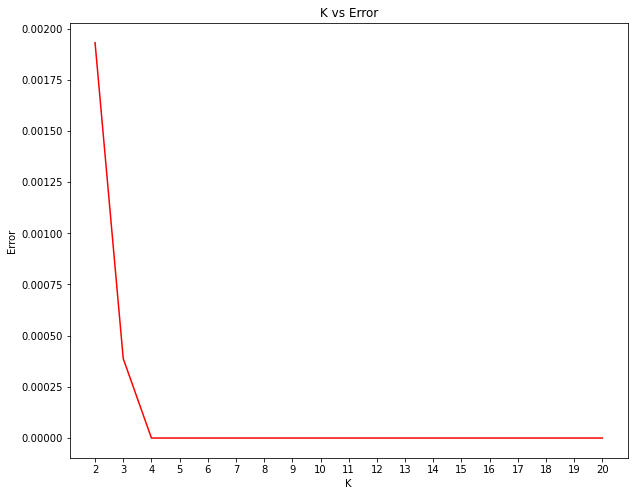

In [58]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
%matplotlib inline
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores, color='r')
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")

As the elbow point is between 3 and 4 I go with 4 clusters.

In [59]:
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(asian_Edmonton_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0])

## Step 3: Dataframe with cluster numbers

Now I create a dataframe that includes cluster number as well as all other information regarding the neighborhoods.

In [60]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
asian_Edmonton_merged = asian_Edmonton.copy()

# add clustering labels
asian_Edmonton_merged["Cluster Labels"] = kmeans.labels_

In [61]:
asian_Edmonton_merged

Neighborhood  Asian Restaurant  \
0                                     Central Beverly          0.000000   
1                                 Central Bonnie Doon          0.000000   
2                   Central Jasper Place, Buena Vista          0.000000   
3                                    Central Mistatim          0.000000   
4                                    East Castledowns          0.000000   
5                                     East Mill Woods          0.000000   
6                    East North Central, West Beverly          0.000000   
7         East Southeast Industrial, South Clover Bar          0.000000   
8                                           Ellerslie          0.000000   
9                         Glenora, SW Downtown Fringe          0.000000   
10                                    Heritage Valley          0.000000   
11                     Horse Hill, East Lake District          0.000000   
12                           Kaskitayo, Aspen Gardens          0.000000   
13                                     North Capilano          0.000000   
14         North Central, Queen Mary Park, Blatchford          0.000000   
15                                     North Downtown          0.020000   
16                                 North Jasper Place          0.000000   
17        North Westmount, West Calder, East Mistatim          0.000000   
18         NorthDowntown Fringe, East Downtown Fringe          0.000000   
19  SE Capilano, West Southeast Industrial, East B...          0.000000   
20                 South Bonnie Doon, East University          0.000000   
21  South Downtown, South Downtown Fringe (Alberta...          0.000000   
22                                   South Industrial          0.000000   
23  South Westmount, Groat Estate, East Northwest ...          0.000000   
24                         Southgate, North Riverbend          0.000000   
25                                 Southwest Edmonton          0.000000   
26                                        The Meadows          0.055556   
27                   The Palisades, West Castle Downs          0.000000   
28                   West Clareview, East Londonderry          0.000000   
29              West Jasper Place, West Edmonton Mall          0.111111   
30                                 West Lake District          0.000000   
31                      West Londonderry, East Calder          0.000000   
32                                    West Mill Woods          0.000000   
33              West Northwest Industrial, Winterburn          0.000000   
34                  West University, Strathcona Place          0.000000   

    Cluster Labels  
0                0  
1                0  
2                0  
3                0  
4                0  
5                0  
6                0  
7                0  
8                0  
9                0  
10               0  
11               0  
12               0  
13               0  
14               0  
15               3  
16               0  
17               0  
18               0  
19               0  
20               0  
21               0  
22               0  
23               0  
24               0  
25               0  
26               2  
27               0  
28               0  
29               1  
30               0  
31               0  
32               0  
33               0  
34               0

In [62]:
# merge asian_Edmonton_grouped with df_Edmonton to add latitude/longitude for each neighborhood
asian_E_merged = asian_Edmonton_merged
asian_E_merged = asian_E_merged.join(Edmonton_venues.set_index("Neighborhood"), on="Neighborhood")

print(asian_E_merged.shape)
asian_E_merged.head()

(310, 9)


Neighborhood  Asian Restaurant  Cluster Labels Neighborhood Latitude  \
0  Central Beverly               0.0               0               53.5766   
0  Central Beverly               0.0               0               53.5766   
0  Central Beverly               0.0               0               53.5766   
0  Central Beverly               0.0               0               53.5766   
0  Central Beverly               0.0               0               53.5766   

  Neighborhood Longitude              Venue  Venue Latitude  Venue Longitude  \
0              -113.4608        Cliff's IGA       53.577698      -113.467193   
0              -113.4608            Winners       53.577192      -113.467356   
0              -113.4608   River City Vapes       53.575014      -113.460650   
0              -113.4608  Wally Footz Field       53.573226      -113.459775   
0              -113.4608  James Kidney Park       53.573199      -113.459914   

     Venue Category  
0     Grocery Store  
0  Department Store  
0        Smoke Shop  
0    Baseball Field  
0              Park

In [63]:
# sort the results by Cluster Labels
print(asian_E_merged.shape)
asian_E_merged.sort_values(["Cluster Labels"], inplace=True)
asian_E_merged.head()

(310, 9)


Neighborhood  Asian Restaurant  \
0                                     Central Beverly               0.0   
22                                   South Industrial               0.0   
23  South Westmount, Groat Estate, East Northwest ...               0.0   
23  South Westmount, Groat Estate, East Northwest ...               0.0   
23  South Westmount, Groat Estate, East Northwest ...               0.0   

    Cluster Labels Neighborhood Latitude Neighborhood Longitude  \
0                0               53.5766              -113.4608   
22               0                53.458              -113.4826   
23               0               53.5614              -113.5461   
23               0               53.5614              -113.5461   
23               0               53.5614              -113.5461   

                      Venue  Venue Latitude  Venue Longitude  \
0               Cliff's IGA       53.577698      -113.467193   
22  Billy D's Driving Range       53.459111      -113.477088   
23          TD Canada Trust       53.560600      -113.551936   
23              Tim Hortons       53.561140      -113.552222   
23               McDonald's       53.561531      -113.552036   

          Venue Category  
0          Grocery Store  
22    Golf Driving Range  
23                  Bank  
23           Coffee Shop  
23  Fast Food Restaurant

Check to see how many Asian restaurents currently exist in Edmonton

In [64]:
asian_E_merged['Venue Category'].value_counts()['Asian Restaurant']

4

## Step 4: Plotting Neighborhood centroids with their cluster on map

Here I will be plotting each neighborhood centroid as a color coded circle that is coded based on its cluster.

In [65]:
address = 'Edmonton, AB'

geolocator = Nominatim(user_agent="ed_explorer")
location = geolocator.geocode(address)
latitude_Ed = location.latitude
longitude_Ed = location.longitude
print('The geograpical coordinate of Edmonton are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Edmonton are 51.0534234, -114.0625892.


In [66]:
# create map
map_clusters = folium.Map(location=[latitude_Ed, longitude_Ed], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(asian_E_merged['Neighborhood Latitude'], asian_E_merged['Neighborhood Longitude'], asian_E_merged['Neighborhood'], asian_E_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

## Step 5: How many Neighborhoods per Cluster?

Here I check to find how many neighborhoods fall into each cluster.

In [67]:
asian_Edmonton_merged.head()

Neighborhood  Asian Restaurant  Cluster Labels
0                    Central Beverly               0.0               0
1                Central Bonnie Doon               0.0               0
2  Central Jasper Place, Buena Vista               0.0               0
3                   Central Mistatim               0.0               0
4                   East Castledowns               0.0               0

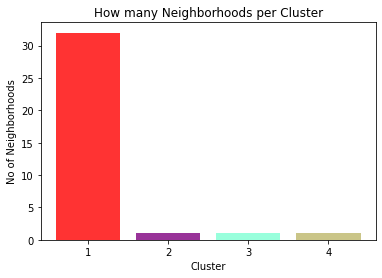

In [68]:
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
performance = asian_Edmonton_merged['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('No of Neighborhoods')
plt.xlabel('Cluster')
plt.title('How many Neighborhoods per Cluster')

plt.show()

In [69]:
# How many neighborhoods in each cluster
asian_Edmonton_merged['Cluster Labels'].value_counts()

0    32
3     1
2     1
1     1
Name: Cluster Labels, dtype: int64

## Step 6: Analyzing each spesific cluster

In this step I analyze each cluster to see how it looks like if we look at them separately.

### Cluster 1

In [70]:
# This will create a dataframe with borough of each neighborhood which we will merge with each cluster dataframe
df_new = df[['Borough', 'Neighborhood']]
# Red 
cluster1 = asian_E_merged.loc[(asian_E_merged['Cluster Labels'] == 0) & (asian_E_merged['Venue Category'] == 'Asian Restaurant')]
df_cluster1 = pd.merge(df_new, cluster1, on='Neighborhood')
df_cluster1

Empty DataFrame
Columns: [Borough, Neighborhood, Asian Restaurant, Cluster Labels, Neighborhood Latitude, Neighborhood Longitude, Venue, Venue Latitude, Venue Longitude, Venue Category]
Index: []

### Cluster 2

In [71]:
# Purple 
cluster2 = asian_E_merged.loc[(asian_E_merged['Cluster Labels'] == 1) & (asian_E_merged['Venue Category'] == 'Asian Restaurant')]
df_cluster2 = pd.merge(df_new, cluster2, on='Neighborhood')
cluster2

Neighborhood  Asian Restaurant  Cluster Labels  \
29  West Jasper Place, West Edmonton Mall          0.111111               1   

   Neighborhood Latitude Neighborhood Longitude        Venue  Venue Latitude  \
29               53.5157              -113.6339  Pinoy Grill       53.517477   

    Venue Longitude    Venue Category  
29      -113.637859  Asian Restaurant

### Cluster 3

In [72]:
# Blue
cluster3 = asian_E_merged.loc[(asian_E_merged['Cluster Labels'] == 2) & (asian_E_merged['Venue Category'] == 'Asian Restaurant')]
df_cluster3 = pd.merge(df_new, cluster3, on='Neighborhood')
df_cluster3

Borough Neighborhood  Asian Restaurant  Cluster Labels  \
0  Edmonton  The Meadows          0.055556               2   

  Neighborhood Latitude Neighborhood Longitude    Venue  Venue Latitude  \
0               53.4768              -113.3662  Wok Box       53.478623   

   Venue Longitude    Venue Category  
0      -113.370603  Asian Restaurant

### Cluster 4

In [73]:
# Turquoise
cluster4 = asian_E_merged.loc[(asian_E_merged['Cluster Labels'] == 3) & (asian_E_merged['Venue Category'] == 'Asian Restaurant')]
df_cluster4 = pd.merge(df_new, cluster4, on='Neighborhood')
df_cluster4

Borough    Neighborhood  Asian Restaurant  Cluster Labels  \
0  Edmonton  North Downtown              0.02               3   
1  Edmonton  North Downtown              0.02               3   

  Neighborhood Latitude Neighborhood Longitude             Venue  \
0               53.5421              -113.4989           Wok Box   
1               53.5421              -113.4989  Japanese Village   

   Venue Latitude  Venue Longitude    Venue Category  
0       53.540922      -113.494924  Asian Restaurant  
1       53.544001      -113.499460  Asian Restaurant

## Step 7: Plotting

In this step I visualize the number of Asian restaurants in each of the clusters.

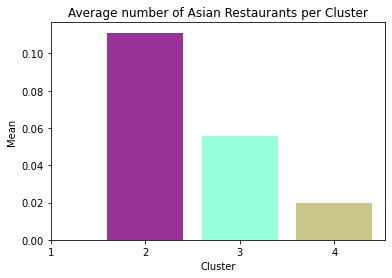

In [74]:
clusters_mean = [df_cluster1['Asian Restaurant'].mean(),df_cluster2['Asian Restaurant'].mean(),df_cluster3['Asian Restaurant'].mean(),
                 df_cluster4['Asian Restaurant'].mean()]
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Asian Restaurants per Cluster')

plt.show()

Results show that the best bet for my company to be successful with its Asian Restaurant business establishment in Edmonton is as follows:
Priority 1: Cluster 1
Priority 2: Cluster 4
Priority 3: Cluster 3
Priority 4: Cluster 2

So by working on establishing an Asian Restaurant branch in neighborhoods fall into cluster 1 I will have a higher chance of succeeding with the business.

## Calgary Area

In [75]:
asian_Calgary = Calgary_grouped[["Neighborhood","Asian Restaurant"]]
asian_Calgary.head()

Neighborhood  Asian Restaurant
0      Braeside, Cedarbrae, Woodbine          0.000000
1  Brentwood, Collingwood, Nose Hill          0.000000
2    Bridgeland, Greenview, Zoo, YYC          0.047619
3         City Centre, Calgary Tower          0.000000
4      Connaught, West Victoria Park          0.000000

## Clustering Neighborhoods and finding the best K in Calgary Area

In [76]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=15, random_state=8)
asian_Calgary_clustering = asian_Calgary.drop(['Neighborhood'], axis=1)

In [77]:
kmeans.fit(asian_Calgary_clustering)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [78]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(asian_Calgary_clustering)
    return km.inertia_

In [79]:
scores = [get_inertia(x) for x in range(2, 21)]

<ipython-input-78-b1d3a0cddffd>:3: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  km.fit(asian_Calgary_clustering)
<ipython-input-78-b1d3a0cddffd>:3: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  km.fit(asian_Calgary_clustering)
<ipython-input-78-b1d3a0cddffd>:3: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  km.fit(asian_Calgary_clustering)
<ipython-input-78-b1d3a0cddffd>:3: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  km.fit(asian_Calgary_clustering)
<ipython-input-78-b1d3a0cddffd>:3: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  km.fit(asian_Calgary_clustering)
<ipython-input-78-

Text(0, 0.5, 'Error')

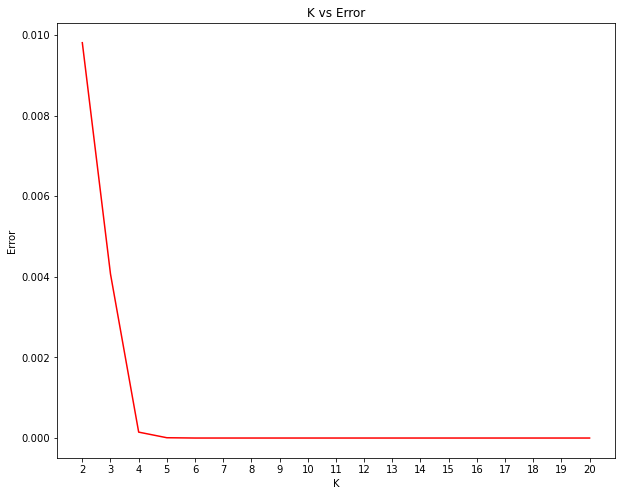

In [80]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
%matplotlib inline
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores, color='r')
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")

In [96]:
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(asian_Calgary_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 3, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [97]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
asian_Calgary_merged = asian_Calgary.copy()

# add clustering labels
asian_Calgary_merged["Cluster Labels"] = kmeans.labels_

In [98]:
asian_Calgary_merged

Neighborhood  Asian Restaurant  \
0                       Braeside, Cedarbrae, Woodbine          0.000000   
1                   Brentwood, Collingwood, Nose Hill          0.000000   
2                     Bridgeland, Greenview, Zoo, YYC          0.047619   
3                          City Centre, Calgary Tower          0.000000   
4                       Connaught, West Victoria Park          0.000000   
5                      Cranston, Auburn Bay, Mahogany          0.000000   
6        Dalhousie, Edgemont, Hamptons, Hidden Valley          0.250000   
7   Discovery Ridge, Signal Hill, West Springs, Ch...          0.000000   
8   Douglas Glen, McKenzie Lake, Copperfield, East...          0.142857   
9            Elbow Park, Britannia, Parkhill, Mission          0.000000   
10                     Forest Lawn, Dover, Erin Woods          0.000000   
11  Hawkwood, Arbour Lake, Citadel, Ranchlands, Ro...          0.000000   
12                        Highfield, Burns Industrial          0.000000   
13  Inglewood, Burnsland, Chinatown, East Victoria...          0.035088   
14         Kensington, Westmont, Parkdale, University          0.000000   
15           Lakeview, Glendale, Killarney, Glamorgan          0.000000   
16  Lynnwood Ridge, Ogden, Foothills Industrial, G...          0.000000   
17    Martindale, Taradale, Falconridge, Saddle Ridge          0.000000   
18                                Midnapore, Sundance          0.000000   
19          Millrise, Somerset, Bridlewood, Evergreen          0.000000   
20     Montgomery, Bowness, Silver Springs, Greenwood          0.000000   
21          Mount Pleasant, Capitol Hill, Banff Trail          0.000000   
22                                  Northeast Calgary          0.000000   
23                                  Northwest Calgary          0.000000   
24  Oak Ridge, Haysboro, Kingsland, Kelvin Grove, ...          0.031250   
25                     Penbrooke Meadows, Marlborough          0.000000   
26    Queensland, Lake Bonavista, Willow Park, Acadia          0.000000   
27  Rosscarrock, Westgate, Wildwood, Shaganappi, S...          0.000000   
28                   Rundle, Whitehorn, Monterey Park          0.000000   
29  Sandstone, MacEwan Glen, Beddington, Harvest H...          0.000000   
30     South Calgary (Altadore / Bankview / Richmond)          0.000000   
31                                      Symons Valley          0.000000   
32                           Thorncliffe, Tuxedo Park          0.000000   
33                              Tuscany, Scenic Acres          0.000000   

    Cluster Labels  
0                0  
1                0  
2                3  
3                0  
4                0  
5                0  
6                1  
7                0  
8                2  
9                0  
10               0  
11               0  
12               0  
13               3  
14               0  
15               0  
16               0  
17               0  
18               0  
19               0  
20               0  
21               0  
22               0  
23               0  
24               3  
25               0  
26               0  
27               0  
28               0  
29               0  
30               0  
31               0  
32               0  
33               0

In [99]:
# merge asian_Edmonton_grouped with df_Edmonton to add latitude/longitude for each neighborhood
asian_C_merged = asian_Calgary_merged
asian_C_merged = asian_C_merged.join(Calgary_venues.set_index("Neighborhood"), on="Neighborhood")

print(asian_C_merged.shape)
asian_C_merged.head()

(338, 9)


Neighborhood  Asian Restaurant  Cluster Labels  \
0  Braeside, Cedarbrae, Woodbine               0.0               0   
0  Braeside, Cedarbrae, Woodbine               0.0               0   
0  Braeside, Cedarbrae, Woodbine               0.0               0   
0  Braeside, Cedarbrae, Woodbine               0.0               0   
0  Braeside, Cedarbrae, Woodbine               0.0               0   

  Neighborhood Latitude Neighborhood Longitude               Venue  \
0               50.9604              -114.1001          Second Cup   
0               50.9604              -114.1001        Fitness Plus   
0               50.9604              -114.1001               Shell   
0               50.9604              -114.1001  Shoppers Drug Mart   
0               50.9604              -114.1001         Dairy Queen   

   Venue Latitude  Venue Longitude  Venue Category  
0       50.961336      -114.104403     Coffee Shop  
0       50.960297      -114.103905             Gym  
0       50.961169      -114.103908     Gas Station  
0       50.960779      -114.104962        Pharmacy  
0       50.960832      -114.105683  Ice Cream Shop

In [100]:
# sort the results by Cluster Labels
print(asian_C_merged.shape)
asian_C_merged.sort_values(["Cluster Labels"], inplace=True)
asian_C_merged.head()

(338, 9)


Neighborhood  Asian Restaurant  \
0               Braeside, Cedarbrae, Woodbine               0.0   
19  Millrise, Somerset, Bridlewood, Evergreen               0.0   
19  Millrise, Somerset, Bridlewood, Evergreen               0.0   
19  Millrise, Somerset, Bridlewood, Evergreen               0.0   
19  Millrise, Somerset, Bridlewood, Evergreen               0.0   

    Cluster Labels Neighborhood Latitude Neighborhood Longitude  \
0                0               50.9604              -114.1001   
19               0               50.9093              -114.0721   
19               0               50.9093              -114.0721   
19               0               50.9093              -114.0721   
19               0               50.9093              -114.0721   

                  Venue  Venue Latitude  Venue Longitude       Venue Category  
0            Second Cup       50.961336      -114.104403          Coffee Shop  
19            Starbucks       50.907819      -114.066413          Coffee Shop  
19      TD Canada Trust       50.905976      -114.067624                 Bank  
19  Shawnessy (C-Train)       50.910258      -114.070530   Light Rail Station  
19            Golf Town       50.906490      -114.068488  Sporting Goods Shop

In [86]:
asian_C_merged['Venue Category'].value_counts()['Asian Restaurant']

6

In [101]:
address = 'Calgary, AB'

geolocator = Nominatim(user_agent="ed_explorer")
location = geolocator.geocode(address)
latitude_Ca = location.latitude
longitude_Ca = location.longitude
print('The geograpical coordinate of Calgary are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Calgary are 51.0534234, -114.0625892.


In [102]:
# create map
map_clusters = folium.Map(location=[latitude_Ca, longitude_Ca], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(asian_C_merged['Neighborhood Latitude'], asian_C_merged['Neighborhood Longitude'], asian_C_merged['Neighborhood'], asian_C_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

## How many Neighborhoods per Cluster?

In [103]:
asian_Calgary_merged.head()

Neighborhood  Asian Restaurant  Cluster Labels
0      Braeside, Cedarbrae, Woodbine          0.000000               0
1  Brentwood, Collingwood, Nose Hill          0.000000               0
2    Bridgeland, Greenview, Zoo, YYC          0.047619               3
3         City Centre, Calgary Tower          0.000000               0
4      Connaught, West Victoria Park          0.000000               0

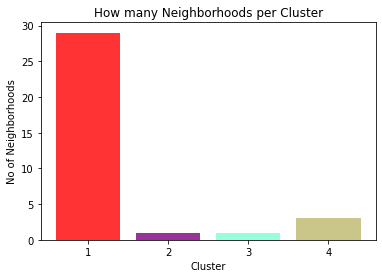

In [106]:
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
performance = asian_Calgary_merged['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine','darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('No of Neighborhoods')
plt.xlabel('Cluster')
plt.title('How many Neighborhoods per Cluster')

plt.show()

In [107]:
# How many neighborhoods in each cluster
asian_Calgary_merged['Cluster Labels'].value_counts()

0    29
3     3
2     1
1     1
Name: Cluster Labels, dtype: int64

## Analyzing each spesific cluster

### Cluster 1

In [108]:
# This will create a dataframe with borough of each neighborhood which we will merge with each cluster dataframe
df_new = df[['Borough', 'Neighborhood']]
# Red 
cluster1 = asian_C_merged.loc[(asian_C_merged['Cluster Labels'] == 0) & (asian_C_merged['Venue Category'] == 'Asian Restaurant')]
df_cluster1 = pd.merge(df_new, cluster1, on='Neighborhood')
df_cluster1

Empty DataFrame
Columns: [Borough, Neighborhood, Asian Restaurant, Cluster Labels, Neighborhood Latitude, Neighborhood Longitude, Venue, Venue Latitude, Venue Longitude, Venue Category]
Index: []

### Cluster 2

In [109]:
# Purple 
cluster2 = asian_C_merged.loc[(asian_C_merged['Cluster Labels'] == 1) & (asian_C_merged['Venue Category'] == 'Asian Restaurant')]
df_cluster2 = pd.merge(df_new, cluster2, on='Neighborhood')
cluster2

Neighborhood  Asian Restaurant  \
6  Dalhousie, Edgemont, Hamptons, Hidden Valley              0.25   

   Cluster Labels Neighborhood Latitude Neighborhood Longitude          Venue  \
6               1             51.126060            -114.143158  Edgemont City   

   Venue Latitude  Venue Longitude    Venue Category  
6       51.126473      -114.138997  Asian Restaurant

### Cluster 3

In [110]:
# Blue
cluster3 = asian_C_merged.loc[(asian_C_merged['Cluster Labels'] == 2) & (asian_C_merged['Venue Category'] == 'Asian Restaurant')]
df_cluster3 = pd.merge(df_new, cluster3, on='Neighborhood')
df_cluster3

Borough                                       Neighborhood  \
0  Calgary  Douglas Glen, McKenzie Lake, Copperfield, East...   

   Asian Restaurant  Cluster Labels Neighborhood Latitude  \
0          0.142857               2               50.9023   

  Neighborhood Longitude                       Venue  Venue Latitude  \
0              -113.9873  Forever Good Asian Cuisine       50.903979   

   Venue Longitude    Venue Category  
0      -113.989547  Asian Restaurant

### Cluster 4

In [111]:
# Dark Khaki
cluster4 = asian_C_merged.loc[(asian_C_merged['Cluster Labels'] == 3) & (asian_C_merged['Venue Category'] == 'Asian Restaurant')]
df_cluster4 = pd.merge(df_new, cluster4, on='Neighborhood')
df_cluster4

Borough                                       Neighborhood  \
0  Calgary                    Bridgeland, Greenview, Zoo, YYC   
1  Calgary  Inglewood, Burnsland, Chinatown, East Victoria...   
2  Calgary  Inglewood, Burnsland, Chinatown, East Victoria...   
3  Calgary  Oak Ridge, Haysboro, Kingsland, Kelvin Grove, ...   

   Asian Restaurant  Cluster Labels Neighborhood Latitude  \
0          0.047619               3               51.0632   
1          0.035088               3               51.0415   
2          0.035088               3               51.0415   
3          0.031250               3               50.9909   

  Neighborhood Longitude            Venue  Venue Latitude  Venue Longitude  \
0              -114.0614         Pho So 1       51.066408      -114.062737   
1              -114.0599      Zen 8 Grill       51.040704      -114.054394   
2              -114.0599  Foreign Concept       51.042635      -114.065902   
3               -114.074      Open Sesame       50.992342      -114.070940   

     Venue Category  
0  Asian Restaurant  
1  Asian Restaurant  
2  Asian Restaurant  
3  Asian Restaurant

## Plotting

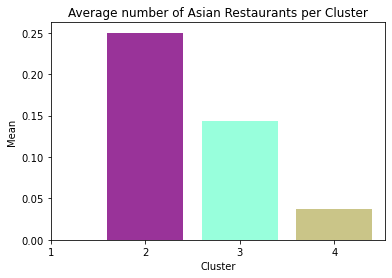

In [113]:
clusters_mean = [df_cluster1['Asian Restaurant'].mean(),df_cluster2['Asian Restaurant'].mean(),df_cluster3['Asian Restaurant'].mean(),df_cluster4['Asian Restaurant'].mean()]
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine','darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Asian Restaurants per Cluster')

plt.show()

For the calgary area, the best bet for my company to be successful in Asian Restaurant business is to focus on neighborhoods falling into cluster 1 then if not a suitable place is found go for neighborhoods in cluster 3.